In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# print(os.getcwd())
os.chdir('./GAN-Estimation-Uncertainty/uncertainty')

In [3]:
import numpy as np

In [4]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils import data
import torchvision

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import math
from tqdm import tqdm

### Useful sites:
1. [Torch-Uncertainty Library](https://github.com/ensta-u2is/torch-uncertainty)
   - A library for uncertainty estimation in deep learning, including deep learning baselines like Deep Ensembles, MC-Dropout, and more. The repository also provides tutorials.

2. [Awesome Uncertainty Deep Learning Repository](https://github.com/ENSTA-U2IS/awesome-uncertainty-deeplearning)
   - A collection of papers and resources related to Uncertainty and Deep Learning.

3. [Paper on Uncertainty Estimation](https://cds.cern.ch/record/2837844/files/2210.09767.pdf)
   - A paper from HSE describing how uncertainty estimation was applied to a GAN task in a physics experiment, specifically the LHCb experiment.


### Prepare test dataset

In [5]:
from datasets.sine import SinDataset

In [6]:
my_dataset = SinDataset(
                  train_data_length = 1024,
                  train_data_length_certain = 800
                )

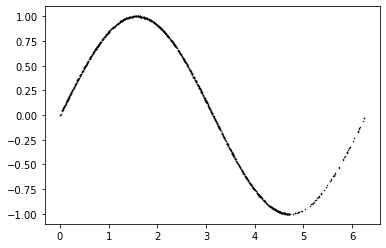

In [7]:
plt.plot(my_dataset[:][1], my_dataset[:][0], 'ko', markersize=0.5)

In [8]:
BATCH_SIZE = 32
train_loader = torch.utils.data.DataLoader(
    my_dataset, batch_size=BATCH_SIZE, shuffle=True
)

### GAN architecture
>start with basic simple cGAN

Define the GAN

>The GAN is designed such that a random latent number or vector is concatenated with a given variable 'x.' The GAN is then trained to learn the mapping from this combined input to the target variable 'y,' where 'y' is defined as the sine of 'x'

In [204]:
from modules.base_GAN import Base_Discriminator, Base_Generator, train, plot_sine

In [205]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [206]:
D = Base_Discriminator().to(device=device)
G = Base_Generator().to(device=device)

In [207]:
#model parametrs
# learning_rate_G = 0.0001
# learning_rate_D = 0.0004
lr = 0.001
NUM_EPOCHS = 200
loss_function = nn.BCELoss()

In [208]:
D_optimizer = torch.optim.Adam(D.parameters(), lr=lr)
G_optimizer = torch.optim.Adam(G.parameters(), lr=lr)
# D_optimizer = optim.Adam(D.parameters(), lr=learning_rate_G, betas=(0.5, 0.999))
# G_optimizer = optim.Adam(G.parameters(), lr=learning_rate_D, betas=(0.5, 0.999))

Train Discriminator

Train Generator

### Training

In [209]:
batches_per_epoch = train_data_length//BATCH_SIZE
batches_per_epoch

NameError: name 'train_data_length' is not defined

In [210]:
from modules.optimal_batch import create_batch, calculate_variance, weights_variancies

In [211]:
NUM_EPOCHS = 200

In [212]:
name = 'base_gan__base_training__1'
save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/tests/'

In [213]:
save_path

'/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/tests/'

In [234]:
D_losses_final, G_losses_final, Variances = train(
    num_epochs = NUM_EPOCHS,
    data_loader = train_loader,
    D = D,
    G = G,
    D_optimizer = D_optimizer,
    G_optimizer = G_optimizer, 
    criterion = loss_function,
    device = device,
    # plot_process = True,
    # save_path = save_path,
    name = f'{name}__process'
    
)
plot_sine(G, save_path = save_path, name = name)


  0%|                                                                                                                                                                               | 0/200 [00:00<?, ?it/s]

tensor([[0.4790],
        [0.3807],
        [0.3602],
        [0.2973],
        [0.5429],
        [0.6334],
        [0.3182],
        [0.5296],
        [0.5530],
        [0.4152],
        [0.3282],
        [0.5794],
        [0.5697],
        [0.3710],
        [0.5064],
        [0.4652],
        [0.3210],
        [0.4769],
        [0.6002],
        [0.1759],
        [0.3129],
        [0.4553],
        [0.5287],
        [0.5803],
        [0.2724],
        [0.6007],
        [0.4592],
        [0.5932],
        [0.2350],
        [0.5691],
        [0.4299],
        [0.3324]], grad_fn=<SigmoidBackward0>) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
   

ZeroDivisionError: division by zero

In [215]:
# D_losses_final = []
# G_losses_final = []
# Variances = []
# # NUM_EPOCHS = NUM_EPOCHS//10
# for epoch in tqdm(range(1, NUM_EPOCHS+1)):           
#     D_losses, G_losses = [], []
#     for batch_idx in range(batches_per_epoch):
#         batch, mean_var = create_batch(
#                                 Generator = G,
#                                 batch_size = BATCH_SIZE,
#                                 get_variance = True,
#                                 repeat = 10,
#                                 num_samples = 128
#                             )
#         x, info = batch#x is y coordiante, we predict it, info is x corrdinate, its condition
#         D_losses.append(D_train(x, info))
#         G_losses.append(G_train(x))
#         Variances.append(mean_var)
#         # print(len(batch), var, x.size(), info.size())
#         # print(var)
#         # break
    
#     # for batch_idx, (x, info) in enumerate(train_loader):
#     #     D_losses.append(D_train(x, info))
#     #     G_losses.append(G_train(x))
        
#     D_losses_final.append(torch.mean(torch.FloatTensor(D_losses)))
#     G_losses_final.append(torch.mean(torch.FloatTensor(G_losses)))
    
#     if epoch % 20 == 0:
#         print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
#                 (epoch),
#                 NUM_EPOCHS,
#                 torch.mean(torch.FloatTensor(D_losses)),
#                 torch.mean(torch.FloatTensor(G_losses))
#                 )
#              )

In [264]:
q1, q2 = weights_variancies(G)
# q


In [262]:
# q

In [273]:
q

({1: 0.012550444382956539,
  2: 0.014144735186744915,
  3: 0.013957432820264497,
  4: 0.023921310456276823,
  5: 0.06751738075452655,
  6: 0.01862073573814202,
  7: 0.03204024306423892,
  8: 0.19311412608302433,
  9: 0.08097636984936264,
  10: 0.5431572216644627},
 {1: 0.0,
  2: 0.6283185307179586,
  3: 1.2566370614359172,
  4: 1.8849555921538759,
  5: 2.5132741228718345,
  6: 3.141592653589793,
  7: 3.7699111843077517,
  8: 4.39822971502571,
  9: 5.026548245743669,
  10: 5.654866776461628})

In [ ]:
import torch
import torch.nn.functional as F

def weighted_categorical_crossentropy(weights):
    """
    A weighted version of categorical crossentropy loss for PyTorch.

    weights: torch tensor of shape (C,) where C is the number of classes
             torch.tensor([0.5, 2, 10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
    """
    weights = torch.tensor(weights, requires_grad=False)

    def loss(y_true, y_pred, from_logits=False):
        if from_logits:
            y_pred = F.softmax(y_pred, dim=-1)

        # clip to prevent NaN's and Inf's
        y_pred = torch.clamp(y_pred, 1e-7, 1 - 1e-7)

        # calculate loss
        loss = y_true * torch.log(y_pred) * weights
        loss = -torch.sum(loss, -1)
        return loss

    return loss

# Example usage:
# weights = [0.5, 2, 10]
# loss_function = weighted_categorical_crossentropy(weights)
# loss_value = loss_function(y_true, y_pred)


In [301]:
q1

{1: 0.009937274450458401,
 2: 0.010061386916807866,
 3: 0.014705181638930415,
 4: 0.04883130833017653,
 5: 0.08768815862293726,
 6: 0.031174961779252098,
 7: 0.06065066189606768,
 8: 0.15052544915280178,
 9: 0.08279745939816543,
 10: 0.5036281578144026}

In [513]:
def wieghts4batch(weights:dict, conditional_info, bins_values:dict):
    
    """
    Assign weights for every point based on conditional information and bins.

    Args:
    - weights (dict): Weights for every interval.
    - conditional_info (torch.Tensor): Tensor with conditional information (coordinate x of sine).
    - bins_values (dict): Bins values.

    Returns:
    - torch.tensor: Weights for every point that we have in condition.
    """
    weights_bins = []
    number_bins = len(bins_values.values())
    sorted_info, indices = torch.sort(conditional_info, axis = 0)
    current_bin_id = 1

    
    
    for i in range(conditional_info.size(0)):
        if current_bin_id == number_bins:
            weights_bins.append(weights[current_bin_id])
            
        else:
            if bins_values[current_bin_id] < sorted_info[i].item() < bins_values[current_bin_id + 1]:
                weights_bins.append(weights[current_bin_id])
                # print(weights_bins)
            else:
                while current_bin_id <= number_bins - 1 and not bins_values[current_bin_id] < sorted_info[i].item() < bins_values[current_bin_id + 1]:
                    current_bin_id += 1
                    weights_bins.append(weights[current_bin_id])
                    
    weights_bins = torch.tensor([torch.tensor(el) for el in weights_bins]) 
    
    return weights_bins[indices].view(-1)
                
            
            
            

        
        
    
    

In [514]:
conditional_info_0 = 2 * math.pi * torch.rand(32).view(-1, 1).to(device)
# conditional_info_0

In [515]:
q1
# conditional_info_0

{1: 0.009937274450458401,
 2: 0.010061386916807866,
 3: 0.014705181638930415,
 4: 0.04883130833017653,
 5: 0.08768815862293726,
 6: 0.031174961779252098,
 7: 0.06065066189606768,
 8: 0.15052544915280178,
 9: 0.08279745939816543,
 10: 0.5036281578144026}

In [516]:
e = wieghts4batch(q1, conditional_info_0, q2)
# e[1]
e

tensor([0.0877, 0.1505, 0.0828, 0.1505, 0.0101, 0.5036, 0.1505, 0.1505, 0.0147,
        0.5036, 0.0147, 0.0607, 0.0488, 0.0828, 0.1505, 0.0488, 0.0828, 0.5036,
        0.0147, 0.0607, 0.0101, 0.0828, 0.0312, 0.0488, 0.0488, 0.5036, 0.0099,
        0.0877, 0.0147, 0.0877, 0.0101, 0.1505], dtype=torch.float64)

In [517]:
# e[1][e[0]]
# e[1]
# [e[0]]

In [443]:
# indices
# bi

In [504]:
r = torch.log(torch.tensor([torch.tensor(i) for i in range(1, 33)]))

In [502]:
sorted, indices = torch.sort(fi, axis = 0)

In [509]:
e.size(), r.size()

(torch.Size([32, 1]), torch.Size([32]))

In [511]:
# r
e.view(-1)

tensor([0.0147, 0.0488, 0.0877, 0.0099, 0.1505, 0.0607, 0.0312, 0.0488, 0.0099,
        0.0607, 0.0099, 0.0877, 0.5036, 0.0877, 0.0147, 0.0147, 0.1505, 0.5036,
        0.1505, 0.0312, 0.0877, 0.0607, 0.0877, 0.0312, 0.0101, 0.0877, 0.0147,
        0.0147, 0.0101, 0.0488, 0.0828, 0.0877], dtype=torch.float64)

In [518]:
r * e
# y_true * torch.log(y_pred) * weights

tensor([0.0000, 0.1043, 0.0910, 0.2087, 0.0162, 0.9024, 0.2929, 0.3130, 0.0323,
        1.1596, 0.0353, 0.1507, 0.1252, 0.2185, 0.4076, 0.1354, 0.2346, 1.4557,
        0.0433, 0.1817, 0.0306, 0.2559, 0.0977, 0.1552, 0.1572, 1.6409, 0.0328,
        0.2922, 0.0495, 0.2982, 0.0346, 0.5217], dtype=torch.float64)

In [296]:
sorted, indices

(tensor([[0.0456],
         [0.4176],
         [0.4313],
         [0.8211],
         [0.8386],
         [1.1532],
         [1.1533],
         [1.3241],
         [1.4270],
         [1.4963],
         [1.6205],
         [1.9789],
         [2.0060],
         [2.0587],
         [2.7573],
         [3.2483],
         [3.2868],
         [3.3186],
         [3.5829],
         [3.9307],
         [3.9659],
         [3.9744],
         [4.1397],
         [4.3980],
         [4.5349],
         [4.8055],
         [5.3615],
         [5.6261],
         [5.7291],
         [5.9323],
         [6.0134],
         [6.2633]]),
 tensor([[26],
         [ 6],
         [ 1],
         [13],
         [12],
         [11],
         [19],
         [23],
         [27],
         [ 2],
         [ 7],
         [ 9],
         [20],
         [17],
         [28],
         [30],
         [29],
         [14],
         [ 3],
         [ 8],
         [18],
         [15],
         [21],
         [ 0],
         [ 5],
         [22],


In [267]:
fi = 2 * math.pi * torch.rand(32).view(-1, 1).to(device)

In [287]:
for el in fi:
    print(el)

tensor([4.3980])
tensor([0.4313])
tensor([1.4963])
tensor([3.5829])
tensor([5.3615])
tensor([4.5349])
tensor([0.4176])
tensor([1.6205])
tensor([3.9307])
tensor([1.9789])
tensor([5.9323])
tensor([1.1532])
tensor([0.8386])
tensor([0.8211])
tensor([3.3186])
tensor([3.9744])
tensor([6.2633])
tensor([2.0587])
tensor([3.9659])
tensor([1.1533])
tensor([2.0060])
tensor([4.1397])
tensor([4.8055])
tensor([1.3241])
tensor([5.7291])
tensor([5.6261])
tensor([0.0456])
tensor([1.4270])
tensor([2.7573])
tensor([3.2868])
tensor([3.2483])
tensor([6.0134])


In [286]:
# fi

In [285]:
np.argsort(fi, axis = 0)

tensor([[26],
        [ 6],
        [ 1],
        [13],
        [12],
        [11],
        [19],
        [23],
        [27],
        [ 2],
        [ 7],
        [ 9],
        [20],
        [17],
        [28],
        [30],
        [29],
        [14],
        [ 3],
        [ 8],
        [18],
        [15],
        [21],
        [ 0],
        [ 5],
        [22],
        [ 4],
        [25],
        [24],
        [10],
        [31],
        [16]])

In [276]:
# fi

weights_batch = []
for el in fi:
    
    
    

SyntaxError: unexpected EOF while parsing (2363432224.py, line 7)

In [265]:
q2

{1: 0.0,
 2: 0.6283185307179586,
 3: 1.2566370614359172,
 4: 1.8849555921538759,
 5: 2.5132741228718345,
 6: 3.141592653589793,
 7: 3.7699111843077517,
 8: 4.39822971502571,
 9: 5.026548245743669,
 10: 5.654866776461628}

In [241]:
q

{1: 0.054925045915632444,
 2: 0.01244914120573787,
 3: 0.0655509472598308,
 4: 0.09765216973587751,
 5: 0.09010051824770855,
 6: 0.11285821530322432,
 7: 0.08806499186442869,
 8: 0.028769156824976723,
 9: 0.2012137062217143,
 10: 0.24841610742086886}

In [ ]:
def get_weights_batch():
    

In [239]:
r

tensor([  -inf, 0.0000, 0.6931, 1.0986, 1.3863])

In [ ]:
weights = [0.1, 0.2]



In [232]:
# torch.tensor([1, 2, 3])
torch.tensor([torch.tensor(i) for i in range(5)])


tensor([0, 1, 2, 3, 4])

In [220]:
int(3.9)

3

In [216]:
# 0.24841610742086886 * 1024

254.37809399896972

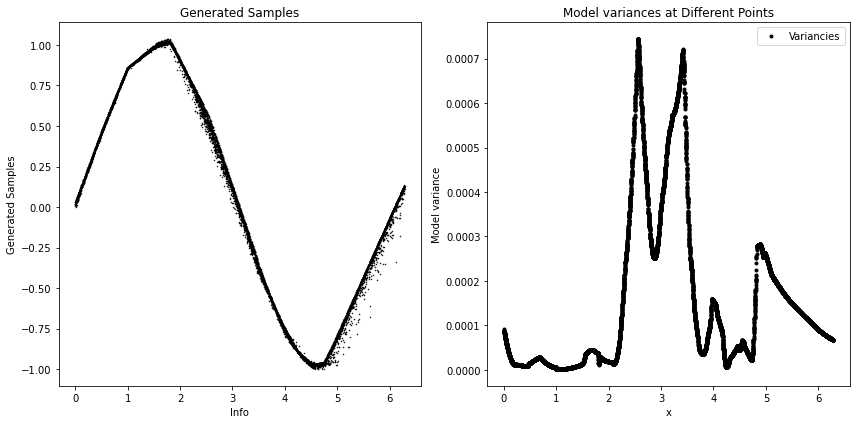

In [186]:
plot_sine(G, save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/tests/', name = 'base_gan__base_training__1')


In [159]:
pwd

'/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty'

## Test

In [736]:
# latent_space_samples = torch.randn(1000, 2)
num_samples = 10000
latent_space_samples = torch.randn(num_samples, 1)
# info = 8 * math.pi * torch.rand(num_samples).view(-1, 1) - 4 * math.pi
info = 2 * math.pi * torch.rand(num_samples).view(-1, 1)
generated_samples = G(latent_space_samples, info)



In [737]:
points_x, res = calculate_variance(G, repeat = 10, num_samples = 10000)

##### 4
> num_samples = 128, lr = 0.0005

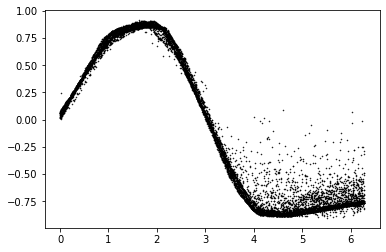

In [691]:
generated_samples = generated_samples.detach()
plt.plot(info, generated_samples, 'ko', markersize = 0.5)

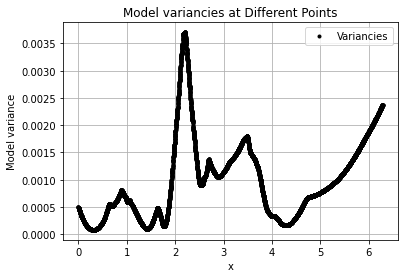

In [693]:
# Plot the graph
plt.plot(points_x, res, 'ko', markersize = 3, label='Variancies')
plt.xlabel('x')
plt.ylabel('Model variance')
plt.title('Model variancies at Different Points')
plt.legend()
plt.grid(True)
plt.show()

##### 3
> num_samples = 128

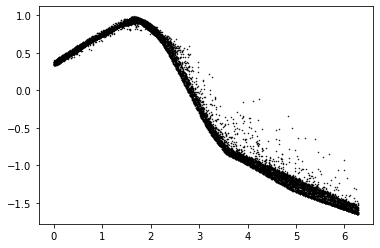

In [738]:
generated_samples = generated_samples.detach()
plt.plot(info, generated_samples, 'ko', markersize = 0.5)

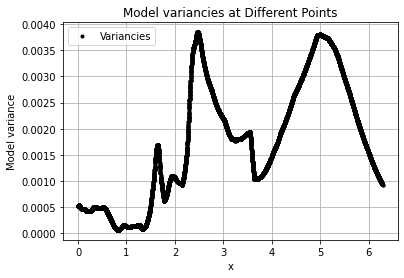

In [739]:
# Plot the graph
plt.plot(points_x, res, 'ko', markersize = 3, label='Variancies')
plt.xlabel('x')
plt.ylabel('Model variance')
plt.title('Model variancies at Different Points')
plt.legend()
plt.grid(True)
plt.show()

##### 2

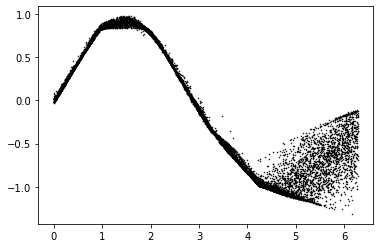

In [723]:
generated_samples = generated_samples.detach()
plt.plot(info, generated_samples, 'ko', markersize = 0.5)

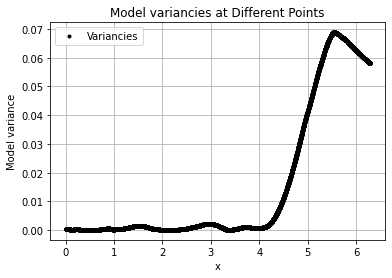

In [724]:
# Plot the graph
plt.plot(points_x, res, 'ko', markersize = 3, label='Variancies')
plt.xlabel('x')
plt.ylabel('Model variance')
plt.title('Model variancies at Different Points')
plt.legend()
plt.grid(True)
plt.show()

##### 1

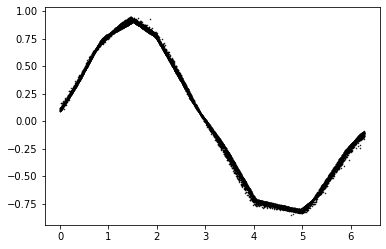

In [647]:
generated_samples = generated_samples.detach()
plt.plot(info, generated_samples, 'ko', markersize = 0.5)

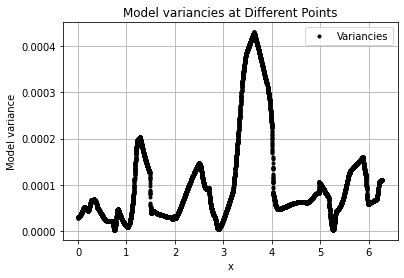

In [652]:
# Plot the graph
plt.plot(points_x, res, 'ko', markersize = 3, label='Variancies')
plt.xlabel('x')
plt.ylabel('Model variance')
plt.title('Model variancies at Different Points')
plt.legend()
plt.grid(True)
plt.show()

#### basic

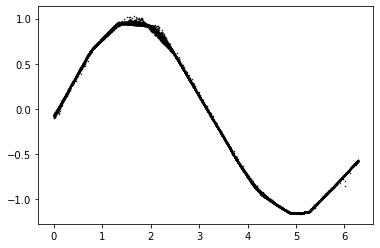

In [627]:
generated_samples = generated_samples.detach()
plt.plot(info, generated_samples, 'ko', markersize = 0.5)

In [628]:
points_x, res = calculate_variance(G, repeat = 1000, num_samples = 10000)

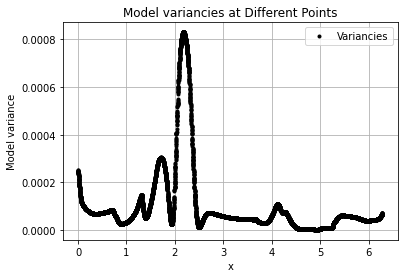

In [629]:
# Plot the graph
plt.plot(points_x, res, 'ko', markersize = 3, label='Variancies')
plt.xlabel('x')
plt.ylabel('Model variance')
plt.title('Model variancies at Different Points')
plt.legend()
plt.grid(True)
plt.show()

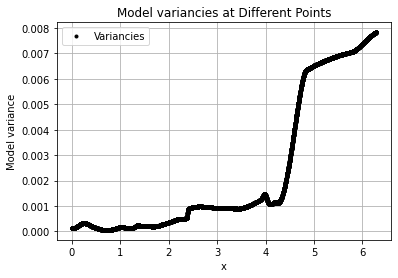

In [593]:
create_batch(G, batch_size = 10,                  
                 get_variance = True,
                 repeat = 10,
                 num_samples = 64)

([tensor([-0.5870, -0.5463, -0.4855, -0.3768, -0.2345, -0.1610, -0.1554, -0.1314,
          -0.1279, -0.0518]),
  tensor([[5.6558],
          [5.7053],
          [5.7763],
          [5.8969],
          [6.0465],
          [6.1215],
          [6.1272],
          [6.1514],
          [6.1550],
          [6.2314]])],
 0.0038968222012272236)